## Homework 8: NN & DL

lib imports

In [16]:
#libs
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Add model

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))


Use SGD as optimizer & compile model (with bin acc meas)

In [18]:
opt = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

In [19]:
#Categorical = multi, 
# Bin for binary 
# MeanSquare for regression
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=opt, metrics=[tf.keras.metrics.BinaryAccuracy()])

Q1 -> Binary CrossEntropy

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

* Q2 ->  11,215,873

In [21]:
idg = ImageDataGenerator(rescale=1./255)

train_ds = idg.flow_from_directory(
    './train/',
    target_size=(150, 150),
    class_mode="binary",
    batch_size=20
)

val_ds = idg.flow_from_directory(
    './validation/',
    target_size=(150, 150),
    class_mode="binary",
    batch_size=20
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 16s 153ms/step - loss: 0.7123 - binary_accuracy: 0.4950 - val_loss: 0.6807 - val_binary_accuracy: 0.5440
Epoch 2/10
100/100 [==============================] - 14s 143ms/step - loss: 0.6787 - binary_accuracy: 0.5320 - val_loss: 0.6643 - val_binary_accuracy: 0.4980
Epoch 3/10
100/100 [==============================] - 12s 119ms/step - loss: 0.6650 - binary_accuracy: 0.5540 - val_loss: 0.6656 - val_binary_accuracy: 0.5450
Epoch 4/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6625 - binary_accuracy: 0.5615 - val_loss: 0.6603 - val_binary_accuracy: 0.5190
Epoch 5/10
100/100 [==============================] - 12s 119ms/step - loss: 0.6553 - binary_accuracy: 0.5755 - val_loss: 0.6540 - val_binary_accuracy: 0.6250
Epoch 6/10
100/100 [==============================] - 13s 128ms/step - loss: 0.6443 - binary_accuracy: 0.6000 - val_loss: 0.6509 - val_binary_accuracy: 0.6190
Epoch 7/10
100/100 [==========================

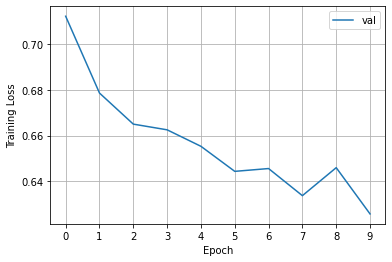

In [23]:
plt.plot(history.history['loss'], label='val')
plt.xticks(np.arange(10))
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid()
plt.legend()


In [24]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [25]:
# median von training accuracy
median_train_accuracy = np.median(history.history["binary_accuracy"])
print("median_train_accuracy %2.3f" % median_train_accuracy)

median_train_accuracy 0.582


In [26]:
# standard deviation of training loss 
std_train_loss = np.std(history.history["loss"])
print("std_train_loss %2.3f" % std_train_loss)

std_train_loss 0.024


Problem discussed in Slack chat, there is a problem in repetition. 
* Q3 -> 0.5x (0.52-0.64)
* Q4 -> 0.01 (0.012 - 0.024)

## Data Augmentation

In [27]:
idg2 = ImageDataGenerator(rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
train_ds2 = idg2.flow_from_directory(
    './train/',
    target_size=(150, 150),
    class_mode="binary",
    batch_size=20
)

Found 20000 images belonging to 2 classes.


In [28]:
# history 
history = model.fit(
    train_ds2,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 16s 156ms/step - loss: 0.6558 - binary_accuracy: 0.5660 - val_loss: 0.6243 - val_binary_accuracy: 0.6370
Epoch 2/10
100/100 [==============================] - 15s 153ms/step - loss: 0.6646 - binary_accuracy: 0.5595 - val_loss: 0.6232 - val_binary_accuracy: 0.5830
Epoch 3/10
100/100 [==============================] - 16s 158ms/step - loss: 0.6504 - binary_accuracy: 0.5865 - val_loss: 0.6140 - val_binary_accuracy: 0.6420
Epoch 4/10
100/100 [==============================] - 18s 176ms/step - loss: 0.6458 - binary_accuracy: 0.5855 - val_loss: 0.6255 - val_binary_accuracy: 0.5990
Epoch 5/10
100/100 [==============================] - 18s 182ms/step - loss: 0.6493 - binary_accuracy: 0.5860 - val_loss: 0.6286 - val_binary_accuracy: 0.6590
Epoch 6/10
100/100 [==============================] - 17s 167ms/step - loss: 0.6469 - binary_accuracy: 0.5855 - val_loss: 0.6204 - val_binary_accuracy: 0.6350
Epoch 7/10
100/100 [==========================

In [29]:
# mean of validation loss
mean_val_loss = np.mean(history.history["val_loss"])
print("mean_val_loss %2.3f" % mean_val_loss)

mean_val_loss 0.617


In [30]:
# mean of validation loss
mean_val_acc_last_five = np.mean(history.history["val_binary_accuracy"][5:])
print("mean_val_acc_last_five %2.3f" % mean_val_acc_last_five)

mean_val_acc_last_five 0.655


* Q5 -> 0.67 (0.607 - 0.65)
* Q6 -> 0.65 (0.6? - 0.662)